# Importando bibliotecas

In [1]:
##
## install required packages
"""!pip install swig
!pip install wrds
!pip install pyportfolioopt
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git"""

'!pip install swig\n!pip install wrds\n!pip install pyportfolioopt\n!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git'

In [2]:
#!pip install QuantStats

In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

%matplotlib inline
from finrl.config import INDICATORS

In [4]:
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from stable_baselines3.common.logger import configure
from finrl import config

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


# 2.Importando os dados

In [5]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
   pass

In [6]:
try:
  treino = pd.read_csv('treino_fund.csv')
  trade = pd.read_csv('trade_fund.csv')
except:
  treino = pd.read_csv('/content/drive/Othercomputers/Meu laptop/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/treino_fund.csv')
  trade = pd.read_csv('/content/drive/Othercomputers/Meu laptop/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/trade_fund.csv')

# If you are not using the data generated from part 1 of this tutorial, make sure
# it has the columns and index in the form that could be make into the environment.
# Then you can comment and skip the following lines.
treino = treino.set_index(treino.columns[0])
treino.index.names = ['']
trade = trade.set_index(trade.columns[0])
trade.index.names = ['']

In [7]:
treino.head()

tic        date       open       high        low      close      volume  \
                                                                               
0  ABEV3  2010-01-11  16.980267  17.050261  16.768290  11.399803   1126114.0   
0  AZUL4  2010-01-11  13.080000  13.170000  13.050000  13.110000  22876500.0   
0  B3SA3  2010-01-11  13.690000  13.780000  13.520000   8.267456   9414700.0   
0  BBAS3  2010-01-11  29.980000  30.070000  29.620001  12.289252   2412800.0   
0  BEEF3  2010-01-11   6.932228   7.040390   6.499578   4.931691   1040278.0   

   day  receita_liquida  resultado_bruto  ...       ATR       PPO      MACD  \
                                          ...                                 
0  2.0         11960.00          7180.00  ...  0.697767  0.000000 -0.013664   
0  4.0         18900.00          9260.00  ... -0.540741  0.000000 -0.010351   
0  3.0           424.76           424.76  ...  2.828918  4.514871  1.235352   
0  3.0         18540.00          6130.00  ...  1.694200  0.749984 -0.026506   
0  4.0           689.06           131.45  ...  0.102229  5.076764  0.771518   

        r01       r05       r10       r63  weekday        vix  turbulence  
                                                                           
0  0.000000  0.000000  0.000000  0.000000        0  17.549999   12.982785  
0  0.000000  0.000000  0.000000  0.000000        0  17.549999   12.982785  
0  0.008895  0.008895  0.111020  0.072445        0  17.549999   12.982785  
0  0.007714  0.013832  0.037996 -0.017284        0  17.549999   12.982785  
0 -0.018840  0.066142  0.177391  0.001479        0  17.549999   12.982785  

[5 rows x 53 columns]

In [8]:
len(trade.columns)

53

# 3.Importando os agentes

In [59]:
if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = False

In [60]:
try:
   trained_a2c = A2C.load("trained_models/agent_a2c_fundamentos") if if_using_a2c else None
except:
  trained_a2c = A2C.load("/content/drive/Othercomputers/Meu laptop/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/trained_models/agent_a2c_fundamentos") if if_using_a2c else None

In [61]:
try:
  trained_ddpg = DDPG.load("trained_models/agent_ddpg_fundamentos") if if_using_ddpg else None
except:
  trained_ddpg = DDPG.load("/content/drive/Othercomputers/Meu laptop/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/trained_models/agent_ddpg_fundamentos") if if_using_ddpg else None

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning:

This system does not have apparently enough memory to store the complete replay buffer 19.40GB > 3.78GB



In [62]:
try:
    trained_ppo = PPO.load("trained_models/agent_ppo_fundamentos") if if_using_ppo else None
except:
    trained_ppo = PPO.load("/content/drive/Othercomputers/Meu laptop/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/trained_models/agent_ppo_fundamentos") if if_using_ppo else None


In [63]:
try:
    trained_td3 = TD3.load("trained_models/agent_td3_fundamentos") if if_using_td3 else None
except:
    trained_td3 = TD3.load("/content/drive/Othercomputers/Meu laptop/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/trained_models/agent_td3_fundamentos") if if_using_td3 else None

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning:

This system does not have apparently enough memory to store the complete replay buffer 19.40GB > 3.71GB



In [64]:
try:
    trained_sac = SAC.load("trained_models/agent_sac_fundamentos") if if_using_sac else None
except:
    trained_sac = SAC.load("/content/drive/Othercomputers/Meu laptop/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/trained_models/agent_sac_fundamentos") if if_using_sac else None

# 4.Desempenho dos modelos nos dados de teste

In [65]:
#funcao para tratar os dados para passar para funcao quantstats
def tratando_retornos(data,coluna):
    net_worth = pd.Series(data[coluna].values, index=pd.to_datetime(data['date']))
    returns = net_worth.pct_change().iloc[1:]
    return returns

In [66]:
def tratando_retornos_mean(data,coluna):
    net_worth = pd.Series(data[coluna].values, index=pd.to_datetime(data.index))
    returns = net_worth.pct_change().iloc[1:]
    return returns

In [67]:
indicadores = trade.columns[8:]
indicadores

Index(['receita_liquida', 'resultado_bruto', 'lucro_liquido', 'lucro_por_acao',
       'preco_lucro', 'preco_vpa', 'preco_receita_liquida', 'preco_fco',
       'preco_ativo_total', 'preco_ebit', 'preco_capital_giro', 'preco_ncav',
       'dividend_yield', 'caixa_equivalentes_caixa', 'divida_curto_prazo',
       'divida_longo_razo', 'divida_liquida', 'valor_patrimonial_acao',
       'retorno_sobre_ativo_inicial', 'margem_ebit',
       'market_cap_empresa_categoria', 'pe_diario', 'preco_resultado_bruto',
       'preco_ebit_diario', 'preco_ativo_total_diario',
       'preco_divida_bruta_diaria', 'preco_divida_liquida_diaria',
       'preco_valor_patrimonial_diaria', 'porcentagem_acoes_ordinarias',
       'setor', 'rank_volume_medio', 'rsi', 'bb_high', 'bb_low', 'NATR', 'ATR',
       'PPO', 'MACD', 'r01', 'r05', 'r10', 'r63', 'weekday', 'vix',
       'turbulence'],
      dtype='object')

In [68]:
stock_dimension = len(treino.tic.unique())
state_space = 1 + 2*stock_dimension + len(indicadores)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 51, State Space: 2398


In [69]:
valor_inicial_carteira = 10000
custo_trade = [0.01]
taxa_aprendizagem = 0.01
iteracao = 100000

In [70]:
stock_dimension

51

In [71]:
buy_cost_list = sell_cost_list = custo_trade * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount":valor_inicial_carteira ,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": indicadores,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = trade, **env_kwargs)

In [72]:
treino.shape

(115515, 53)

In [73]:
trade.shape

(60486, 53)

In [74]:
e_trade_gym = StockTradingEnv(df = trade,**env_kwargs,make_plots=True)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

## Avaliando A2C

In [75]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment = e_trade_gym) if if_using_a2c else (None, None)

hit end!


## Avaliando ddpg

In [76]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg,
    environment = e_trade_gym) if if_using_ddpg else (None, None)

hit end!


## Avaliando PPO

In [77]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo,
    environment = e_trade_gym) if if_using_ppo else (None, None)

hit end!


## Avaliando TD3

In [78]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3,
    environment = e_trade_gym) if if_using_td3 else (None, None)

hit end!


## Avaliando SAC

In [79]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac,
    environment = e_trade_gym) if if_using_sac else (None, None)

# 5.Carteira de otimização de variançia média

In [80]:
def process_df_for_mvo(df):
  df = df.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]
  fst = df
  fst = fst.iloc[0:stock_dimension, :]
  tic = fst['tic'].tolist()

  mvo = pd.DataFrame()

  for k in range(len(tic)):
    mvo[tic[k]] = 0

  for i in range(df.shape[0]//stock_dimension):
    n = df
    n = n.iloc[i * stock_dimension:(i+1) * stock_dimension, :]
    date = n['date'][i*stock_dimension]
    mvo.loc[date] = n['close'].tolist()

  return mvo

In [81]:
# Codes in this section partially refer to Dr G A Vijayalakshmi Pai

# https://www.kaggle.com/code/vijipai/lesson-5-mean-variance-optimization-of-portfolios/notebook

def StockReturnsComputing(StockPrice, Rows, Columns):
  import numpy as np
  StockReturn = np.zeros([Rows-1, Columns])
  for j in range(Columns):        # j: Assets
    for i in range(Rows-1):     # i: Daily Prices
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

  return StockReturn

In [82]:
StockData = process_df_for_mvo(treino)
TradeData = process_df_for_mvo(trade)

TradeData.to_numpy()

array([[14.935, 37.2  ,  8.135, ...,  8.741,  4.99 , 25.448],
       [15.151, 37.47 ,  8.315, ...,  8.839,  5.105, 26.592],
       [15.289, 37.   ,  8.233, ...,  8.666,  5.335, 26.964],
       ...,
       [13.22 , 21.34 , 12.34 , ..., 36.13 ,  5.14 , 19.04 ],
       [13.04 , 21.34 , 12.07 , ..., 36.08 ,  5.14 , 19.   ],
       [12.97 , 21.34 , 12.03 , ..., 36.02 ,  5.09 , 18.87 ]])

In [83]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)

Mean returns of assets in k-portfolio 1
 [ 0.016  0.057  0.04   0.078  0.016  0.002  0.046  0.043  0.069 -0.012
  0.059  0.028  0.086  0.019  0.014  0.069  0.065  0.083  0.063  0.098
  0.091  0.094  0.065 -0.001  0.042  0.068  0.068  0.059  0.009  0.077
  0.125  0.059  0.06   0.     0.029  0.033 -0.011 -0.001  0.021  0.106
  0.076  0.086  0.     0.08  -0.028  0.024  0.049  0.054  0.076 -0.043
  0.1  ]
Variance-Covariance matrix of returns
 [[1.238 0.125 0.72  ... 0.462 0.134 0.531]
 [0.125 3.441 0.423 ... 0.153 0.236 0.359]
 [0.72  0.423 6.543 ... 1.01  0.352 1.617]
 ...
 [0.462 0.153 1.01  ... 2.902 0.168 0.831]
 [0.134 0.236 0.352 ... 0.168 5.297 0.431]
 [0.531 0.359 1.617 ... 0.831 0.431 7.066]]


In [84]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.5))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([valor_inicial_carteira * cleaned_weights_mean[i] for i in range(stock_dimension)])

In [85]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)

In [86]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
# MVO_result

In [87]:
pesos_acoes_mean_var = pd.DataFrame(cleaned_weights_mean.values(),trade.tic.unique(),columns = ['Pesos']).sort_values(by='Pesos',ascending=False)
pesos_acoes_mean_var.head(15)

Pesos
ENGI11  0.15720
TAEE11  0.15249
EQTL3   0.13167
CVCB3   0.12890
WEGE3   0.08032
RENT3   0.06814
EMBR3   0.06100
EGIE3   0.05635
MDIA3   0.05000
AZUL4   0.04483
YDUQ3   0.02415
MGLU3   0.02005
FLRY3   0.01820
SBSP3   0.00671
SANB11  0.00000

# 6.Bentmarch

## Index Ibovespa

In [88]:
#Pegando as datas para importar o indice ibovespa
TRAIN_START_DATE = treino.date.min()
TRAIN_END_DATE = treino.date.max()
TRADE_START_DATE = trade.date.min()
TRADE_END_DATE = trade.date.max()

In [89]:
print('Treino inicio',TRAIN_START_DATE, 'e treino final',TRAIN_END_DATE)
print('Teste inicio',TRADE_START_DATE, 'e teste final',TRADE_END_DATE)

Treino inicio 2010-01-11 e treino final 2019-01-09
Teste inicio 2019-01-11 e teste final 2023-09-27


In [90]:
df_ibovespa = YahooDownloader(start_date = TRADE_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = ['^BVSP']).fetch_data()

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (1171, 8)


In [91]:
df_ibovespa.head()

date     open     high      low    close   volume    tic  day
0  2019-01-11  93806.0  93961.0  93359.0  93658.0  5330500  ^BVSP    4
1  2019-01-14  93645.0  94474.0  93335.0  94474.0  4486900  ^BVSP    0
2  2019-01-15  94474.0  94695.0  93402.0  94056.0  4836400  ^BVSP    1
3  2019-01-16  94057.0  94393.0  93687.0  94393.0  4257400  ^BVSP    2
4  2019-01-17  94393.0  95682.0  93950.0  95351.0  4944200  ^BVSP    3

In [92]:
df_ibovespa = df_ibovespa[['date','close']]
fst_day = df_ibovespa['close'][0]
ibovespa = pd.merge(df_ibovespa['date'], df_ibovespa['close'].div(fst_day).mul(valor_inicial_carteira),
               how='outer', left_index=True, right_index=True).set_index('date')

In [93]:
df_ibovespa.head()

date    close
0  2019-01-11  93658.0
1  2019-01-14  94474.0
2  2019-01-15  94056.0
3  2019-01-16  94393.0
4  2019-01-17  95351.0

## CDI

[IPEADATA](https://analisemacro.com.br/economia/indicadores/coletando-dados-do-ipeadata-com-python/)

In [94]:
!pip install ipeadatapy
import ipeadatapy as ip

In [95]:
ipea_data = ip.list_series()

In [96]:
ipea_data[ipea_data.NAME.str.contains('CDI')]

CODE                                           NAME
8244   BM12_TJCDI12  Taxa de juros - CDI / Over - acumulada no mês
8282  SGS366_CDI366                            Taxa de juros - CDI

In [97]:
ip.describe('SGS366_CDI366')

Taxa de juros - CDI
Name                                          Taxa de juros - CDI
Code                                                SGS366_CDI366
Big Theme                                          Macroeconômico
Theme code                                                     39
Source          Banco Central do Brasil, Sistema Gerenciador d...
Source acronym                                   Bacen Outras/SGS
Comment         Receber uma quantia hoje ou no futuro não são ...
Last update                          2023-12-11T13:07:59.85-03:00
Frequency                                                  Diária
Measure                                                       (%)
Unit                                                             
Status                                                          A

In [98]:
ip.describe('SGS366_CDI366')

Taxa de juros - CDI
Name                                          Taxa de juros - CDI
Code                                                SGS366_CDI366
Big Theme                                          Macroeconômico
Theme code                                                     39
Source          Banco Central do Brasil, Sistema Gerenciador d...
Source acronym                                   Bacen Outras/SGS
Comment         Receber uma quantia hoje ou no futuro não são ...
Last update                          2023-12-11T13:07:59.85-03:00
Frequency                                                  Diária
Measure                                                       (%)
Unit                                                             
Status                                                          A

In [99]:
selic_diaria = ip.timeseries('SGS366_CDI366')

In [100]:
selic_diaria.head()

CODE                   RAW DATE  DAY  MONTH  YEAR  \
DATE                                                                     
1986-03-06  SGS366_CDI366  1986-03-06T00:00:00-03:00    6      3  1986   
1986-03-10  SGS366_CDI366  1986-03-10T00:00:00-03:00   10      3  1986   
1986-03-12  SGS366_CDI366  1986-03-12T00:00:00-03:00   12      3  1986   
1986-03-14  SGS366_CDI366  1986-03-14T00:00:00-03:00   14      3  1986   
1986-03-17  SGS366_CDI366  1986-03-17T00:00:00-03:00   17      3  1986   

            VALUE ((%))  
DATE                     
1986-03-06     0.068111  
1986-03-10     0.069028  
1986-03-12     0.067417  
1986-03-14     0.064584  
1986-03-17     0.068222

In [101]:
selic_diaria = (selic_diaria['VALUE ((%))']/100).to_frame()

In [102]:
min_date = trade['date'].min()
max_date = trade['date'].max()

selic_diaria = selic_diaria[(selic_diaria.index >= min_date) & (selic_diaria.index <= max_date)]
selic_diaria

VALUE ((%))
DATE                   
2019-01-11     0.000246
2019-01-14     0.000246
2019-01-15     0.000246
2019-01-16     0.000246
2019-01-17     0.000246
...                 ...
2023-09-21     0.000473
2023-09-22     0.000473
2023-09-25     0.000473
2023-09-26     0.000473
2023-09-27     0.000473

[1185 rows x 1 columns]

In [103]:
selic_return = (selic_diaria['VALUE ((%))']+1).cumprod().mul(valor_inicial_carteira).to_frame()

In [104]:
selic_return

VALUE ((%))
DATE                    
2019-01-11  10002.462000
2019-01-14  10004.924606
2019-01-15  10007.387819
2019-01-16  10009.851637
2019-01-17  10012.316063
...                  ...
2023-09-21  13983.078102
2023-09-22  13989.689301
2023-09-25  13996.303626
2023-09-26  14002.921079
2023-09-27  14009.541660

[1185 rows x 1 columns]

# 7. Plotando dos retornos

In [105]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0]) if if_using_a2c else None
if if_using_a2c:
    df_result_a2c.columns = ['a2c']
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0]) if if_using_ddpg else None
if if_using_ddpg:
    df_result_ddpg.columns = ['ddpg']
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0]) if if_using_ppo else None
if if_using_ppo:
    df_result_ppo.columns = ['ppo']
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0]) if if_using_td3 else None
if if_using_td3:
    df_result_td3.columns = ['td3']
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0]) if if_using_sac else None
if if_using_sac:
    df_result_sac.columns = ['sac']

result = pd.DataFrame()
if if_using_a2c: result = pd.merge(result, df_result_a2c, how='outer', left_index=True, right_index=True)

if if_using_ddpg: result = pd.merge(result, df_result_ddpg, how='outer', left_index=True, right_index=True)
if if_using_ppo: result = pd.merge(result, df_result_ppo, how='outer', left_index=True, right_index=True)
if if_using_td3: result = pd.merge(result, df_result_td3, how='outer', left_index=True, right_index=True)
if if_using_sac: result = pd.merge(result, df_result_sac, how='outer', left_index=True, right_index=True)
result = pd.merge(result, MVO_result, how='outer', left_index=True, right_index=True)
result = pd.merge(result, ibovespa, how='outer', left_index=True, right_index=True).fillna(method='bfill')
result = result.rename(columns={result.columns[-1]: 'Ibovespa'})
result.index = pd.to_datetime(result.index, format='%Y-%m-%d')
result = pd.merge(result, selic_return[selic_return.index.isin(result.index)], how='outer', left_index=True, right_index=True)
result = result.rename(columns={result.columns[-1]: 'CDI'})

C:\Users\jefer\AppData\Local\Temp\ipykernel_15812\385085763.py:25: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [106]:
result.head()

a2c          ddpg           ppo           td3  \
2019-01-11  10000.000000  10000.000000  10000.000000  10000.000000   
2019-01-14  10155.699995  10054.596777  10036.760266  10138.471294   
2019-01-15  10161.972760  10017.640351   9945.672765  10113.227798   
2019-01-16  10123.868230  10090.328372   9964.862246  10107.329528   
2019-01-17  10412.361772  10339.067153  10003.084039  10347.328754   

                Mean Var      Ibovespa           CDI  
2019-01-11  10143.295443  10000.000000  10002.462000  
2019-01-14  10251.842789  10087.125499  10004.924606  
2019-01-15  10194.050502  10042.495035  10007.387819  
2019-01-16  10212.852258  10078.477012  10009.851637  
2019-01-17  10267.190622  10180.764056  10012.316063

<Axes: >

<Figure size 1500x500 with 0 Axes>

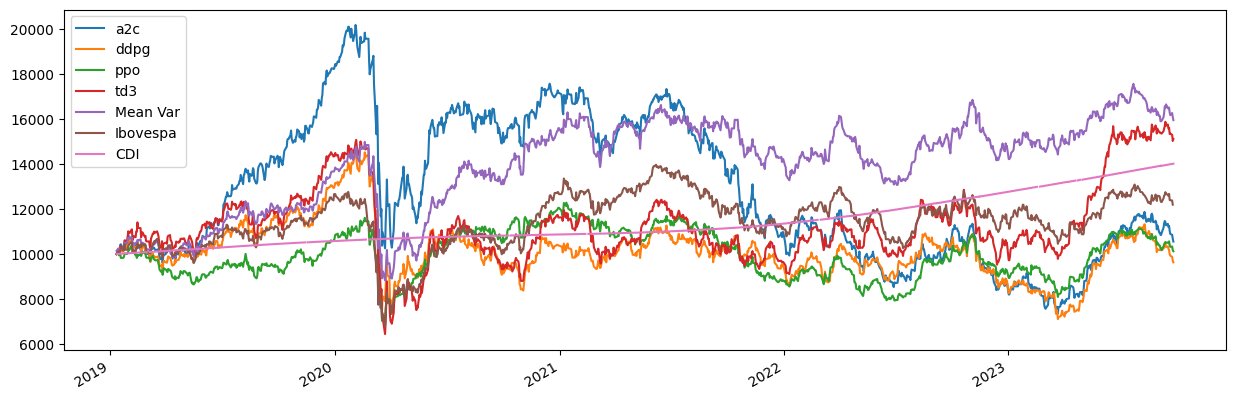

In [107]:
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
result.plot()

In [109]:
import plotly.graph_objs as go
import plotly.offline as pyo
# Criar traces para cada linha
trace_a2c = go.Scatter(x=result.index, y=result.a2c,  mode='lines', name='A2C')
trace_ddpg = go.Scatter(x=result.index, y=result.ddpg, mode='lines', name='DDPG')
trace_ppo = go.Scatter(x=result.index, y=result.ppo, mode='lines', name='PPO')
trace_td3 = go.Scatter(x=result.index, y=result.td3, mode='lines', name='TD3')
#trace_sac = go.Scatter(x=result.index, y=result.sac, mode='lines', name='SAC')
trace_Mean_Var = go.Scatter(x=result.index, y=result['Mean Var'], mode='lines', name='Mean Var')
trace_Ibovespa = go.Scatter(x=result.index, y=result.Ibovespa, mode='lines', name='Ibovespa')
trace_CDI = go.Scatter(x=result.index, y=result.CDI, mode='lines', name='CDI')

# Colocar as traces em uma lista
data = [trace_a2c,
        trace_ddpg,
        trace_ppo,
        trace_td3,
       # trace_sac,
        trace_Mean_Var,
        trace_Ibovespa,
        trace_CDI]

# Layout do gráfico
layout = go.Layout(title='Comparação de Dados',
                   xaxis=dict(title='Data'),
                   yaxis=dict(title='Valores'))
# Criar a figura e plotar
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='dados.html')

'dados.html'

# 8 Informacoes dos retornos
pass in df_account_value, this information is stored in env class

In [110]:
from datetime import datetime

In [111]:
datetime.now().strftime('%Y%m%d-%Hh%M')

'20231212-09h12'

In [112]:
print("==============Get Backtest Results===========")
#now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
now = datetime.now().strftime('%Y%m%d-%Hh%M')
if if_using_ppo:
  print("\n ppo:")
  perf_stats_all_ppo = backtest_stats(account_value=df_account_value_ppo)
  perf_stats_all_ppo = pd.DataFrame(perf_stats_all_ppo)
  perf_stats_all_ppo.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_ppo_"+now+'.csv')

if if_using_ddpg:
  print("\n ddpg:")
  perf_stats_all_ddpg = backtest_stats(account_value=df_account_value_ddpg)
  perf_stats_all_ddpg = pd.DataFrame(perf_stats_all_ddpg)
  perf_stats_all_ddpg.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_ddpg_"+now+'.csv')

if if_using_a2c:
  print("\n a2c:")
  perf_stats_all_a2c = backtest_stats(account_value=df_account_value_a2c)
  perf_stats_all_a2c = pd.DataFrame(perf_stats_all_a2c)
  perf_stats_all_a2c.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_a2c_"+now+'.csv')

if if_using_td3:
  print("\n atd3:")
  perf_stats_all_td3 = backtest_stats(account_value=df_account_value_td3)
  perf_stats_all_td3 = pd.DataFrame(perf_stats_all_td3)
  perf_stats_all_td3.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_td3_"+now+'.csv')

if if_using_sac:
  print("\n sac:")
  perf_stats_all_sac = backtest_stats(account_value=df_account_value_sac)
  perf_stats_all_sac = pd.DataFrame(perf_stats_all_sac)
  perf_stats_all_sac.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_sac_"+now+'.csv')

==============Get Backtest Results===========

 ppo:
Annual return          0.002674
Cumulative returns     0.012645
Annual volatility      0.252269
Sharpe ratio           0.138531
Calmar ratio           0.006790
Stability              0.004117
Max drawdown          -0.393767
Omega ratio            1.026210
Sortino ratio          0.185849
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.963216
Daily value at risk   -0.031644
dtype: float64

 ddpg:
Annual return         -0.007900
Cumulative returns    -0.036641
Annual volatility      0.317196
Sharpe ratio           0.136622
Calmar ratio          -0.015490
Stability              0.181548
Max drawdown          -0.510041
Omega ratio            1.025697
Sortino ratio          0.183191
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.045345
Daily value at risk   -0.039791
dtype: float64

 a2c:
Annual return          0.011517
Cumulative returns     0.055374
Annual

# 9.Quantstats:
Se rodar essa biblioteca antes da um erro, tente instalar so depois

**Para mais informações sobre [quantstats](https://pypi.org/project/QuantStats/)**

In [113]:
import quantstats as qs

## A2C

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-01-15   2019-01-15
End Period                 2023-09-27   2023-09-27
Risk-Free Rate             0.0%         0.0%
Time in Market             97.0%        97.0%

Cumulative Return          21.01%       3.92%
CAGR﹪                     2.84%        0.57%

Sharpe                     0.29         0.2
Prob. Sharpe Ratio         73.12%       66.3%
Smart Sharpe               0.27         0.18
Sortino                    0.39         0.27
Smart Sortino              0.36         0.25
Sortino/√2                 0.27         0.19
Smart Sortino/√2           0.26         0.18
Omega                      1.04         1.04

Max Drawdown               -46.82%      -63.47%
Longest DD Days            842          1331
Volatility (ann.)          26.63%       33.74%
R^2                        0.6          0.6
Information Ratio          -0.0         -0.0
Calmar                  

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-05  2023-03-23  2023-09-27  1331    -63.473224        -61.625126
2  2019-01-31  2019-03-27  2019-06-06   127    -11.404041         -9.989899
3  2019-09-04  2019-09-09  2019-09-16    13     -5.263495         -4.271622
4  2019-08-22  2019-08-27  2019-08-29     8     -4.940022         -4.875558
5  2019-08-12  2019-08-15  2019-08-20     9     -4.138916         -2.843827

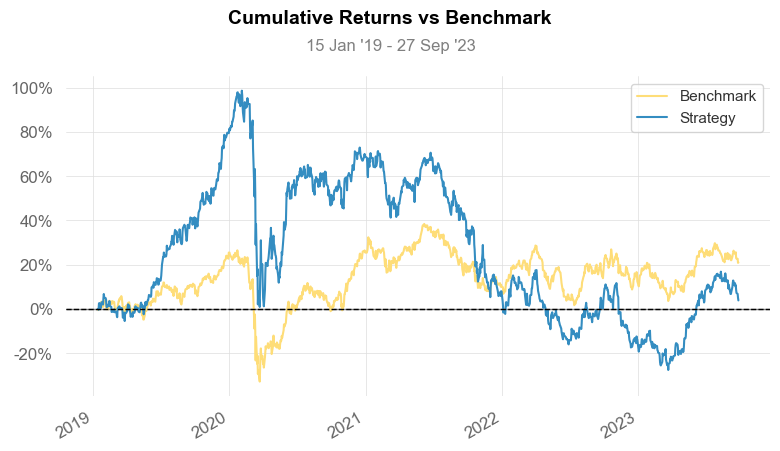

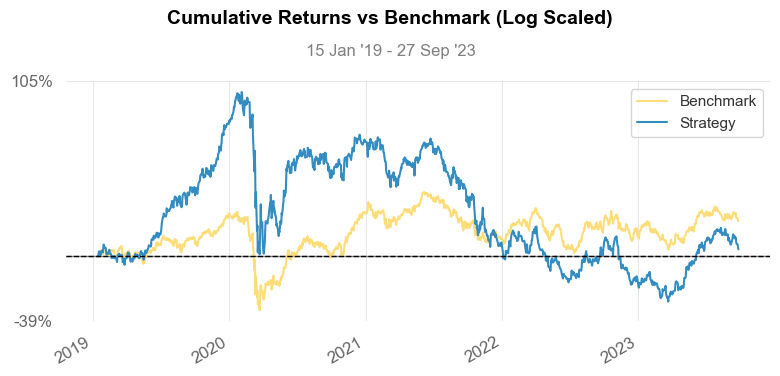

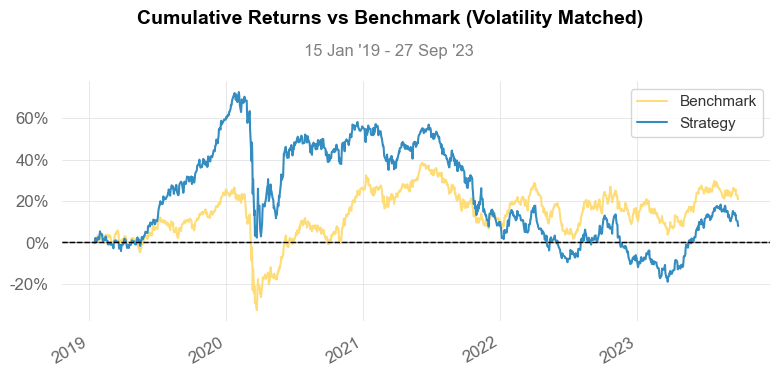

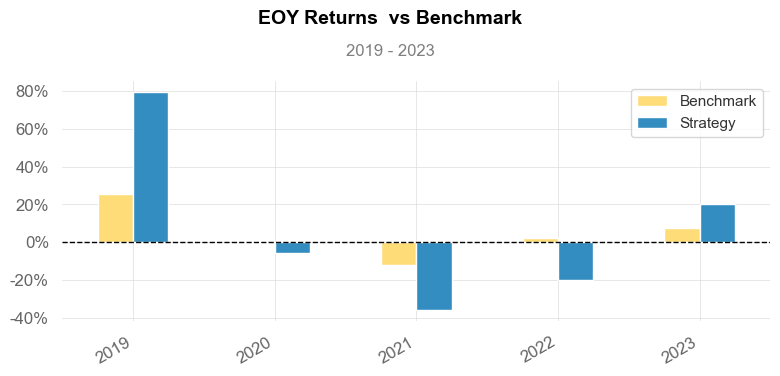

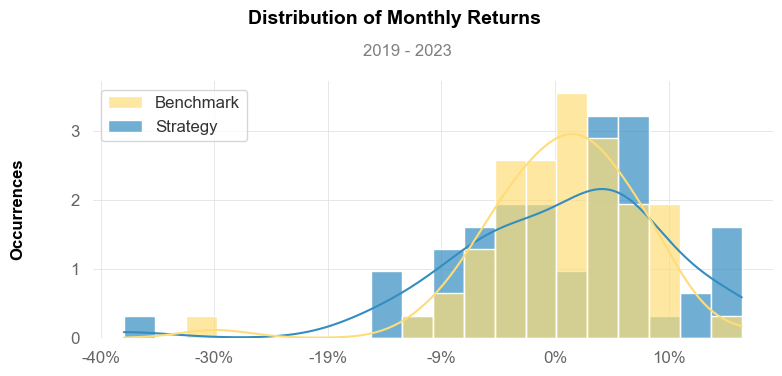

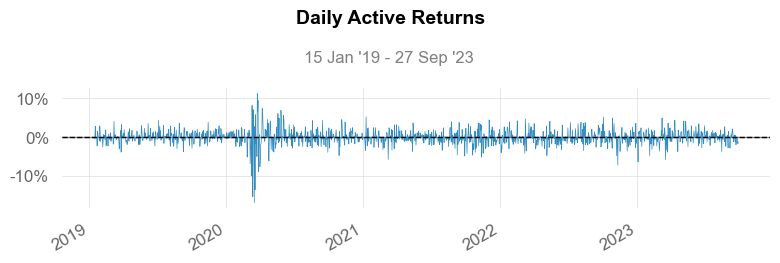

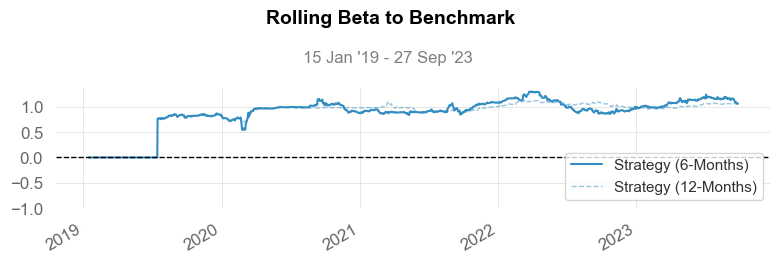

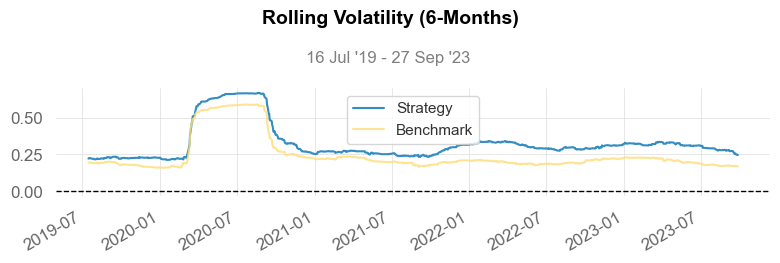

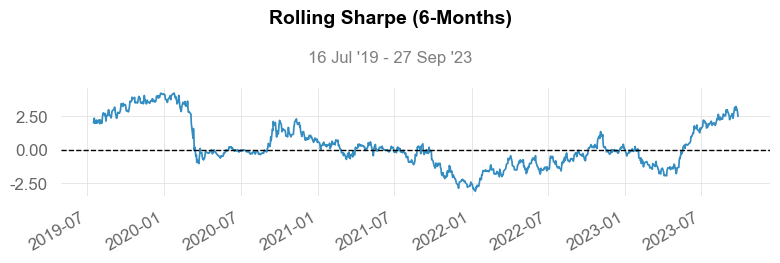

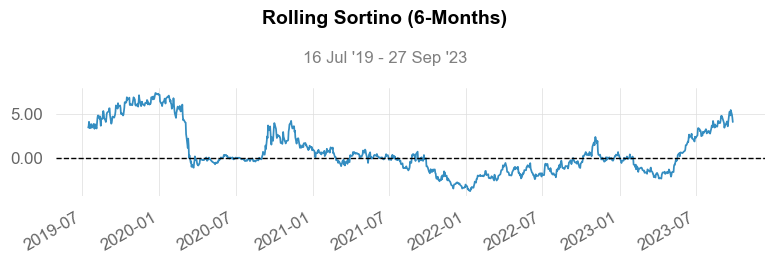

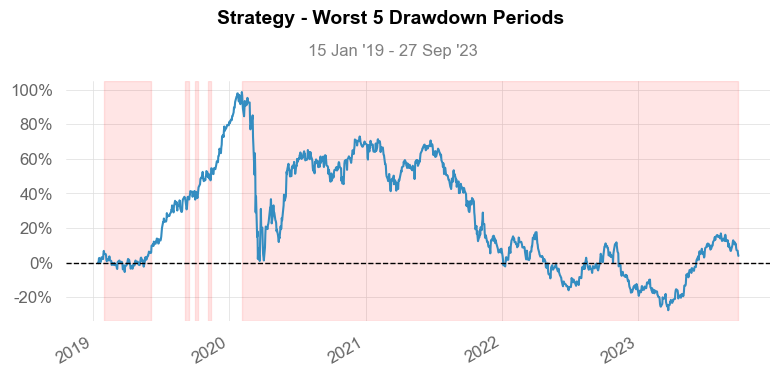

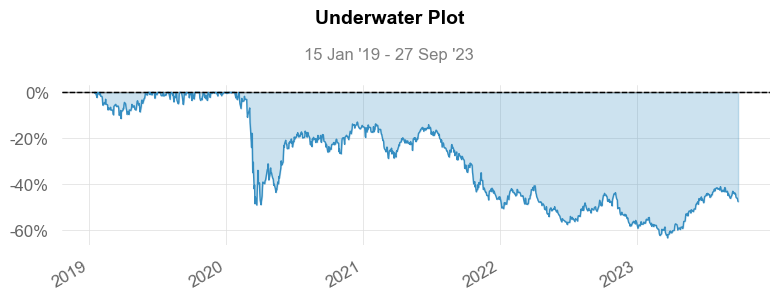

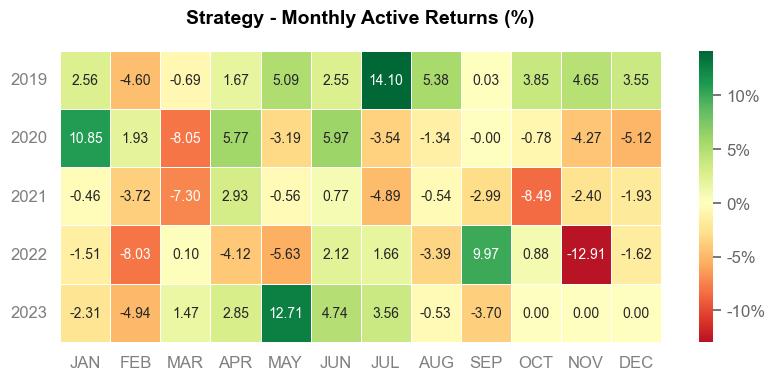

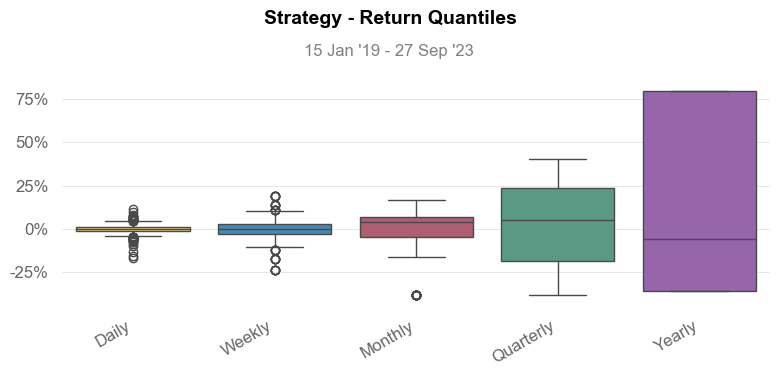

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [114]:
try:
    if if_using_a2c:
        returns_a2c = tratando_retornos(df_account_value_a2c,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_a2c,'^BVSP')
        qs.reports.html(returns_a2c, '^BVSP',output='a2c_quantstats.html')
except:
    pass

## DDPG

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-01-15   2019-01-15
End Period                 2023-09-27   2023-09-27
Risk-Free Rate             0.0%         0.0%
Time in Market             97.0%        97.0%

Cumulative Return          21.01%       -4.19%
CAGR﹪                     2.84%        -0.63%

Sharpe                     0.29         0.13
Prob. Sharpe Ratio         73.12%       61.28%
Smart Sharpe               0.26         0.12
Sortino                    0.39         0.18
Smart Sortino              0.36         0.16
Sortino/√2                 0.27         0.13
Smart Sortino/√2           0.25         0.12
Omega                      1.03         1.03

Max Drawdown               -46.82%      -51.0%
Longest DD Days            842          1316
Volatility (ann.)          26.63%       31.73%
R^2                        0.53         0.53
Information Ratio          -0.01        -0.01
Calmar             

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-20  2023-03-23  2023-09-27  1316    -51.004065        -48.874997
2  2019-01-31  2019-03-27  2019-07-03   154    -13.337547        -11.284394
3  2019-08-12  2019-08-27  2019-09-27    47    -11.624590        -10.877516
4  2019-10-23  2019-11-21  2019-12-05    44     -7.579201         -7.495155
5  2020-02-05  2020-02-10  2020-02-18    14     -5.782919         -4.852727

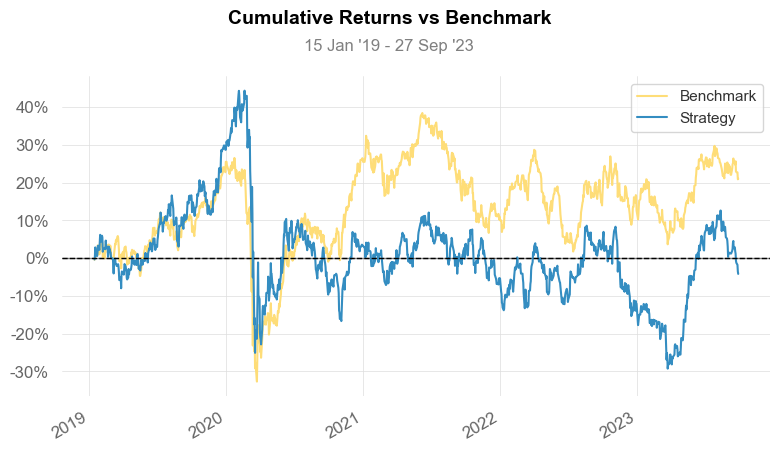

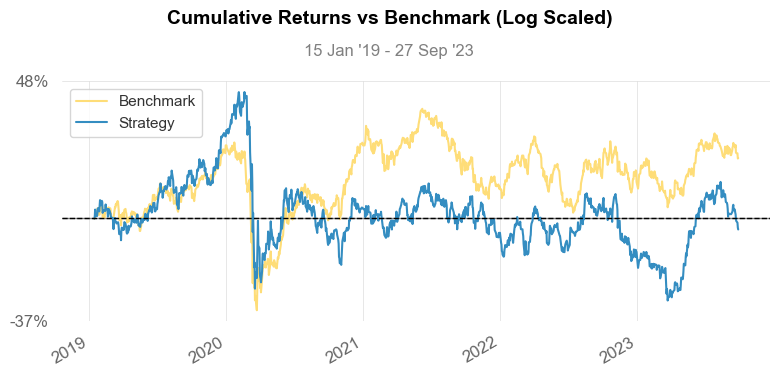

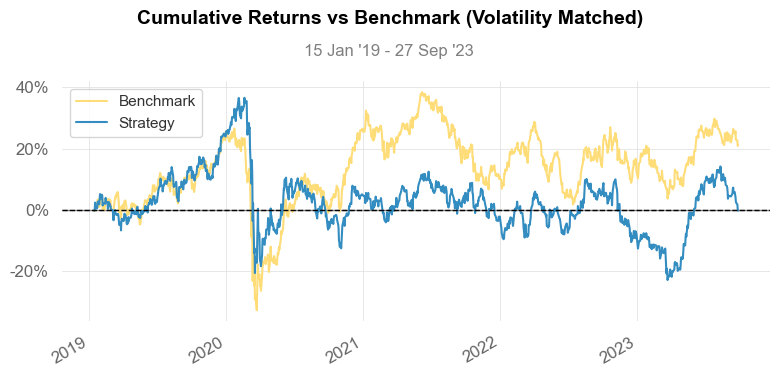

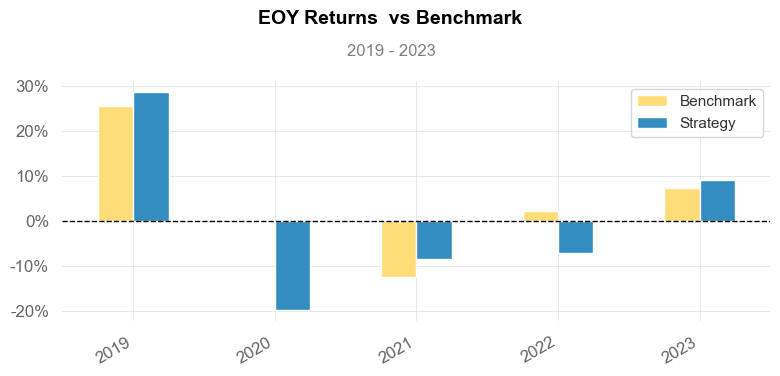

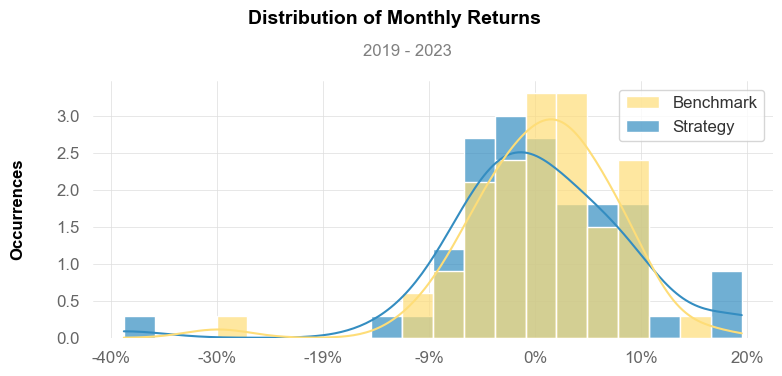

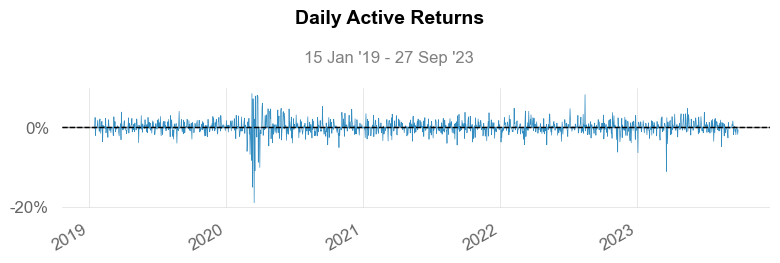

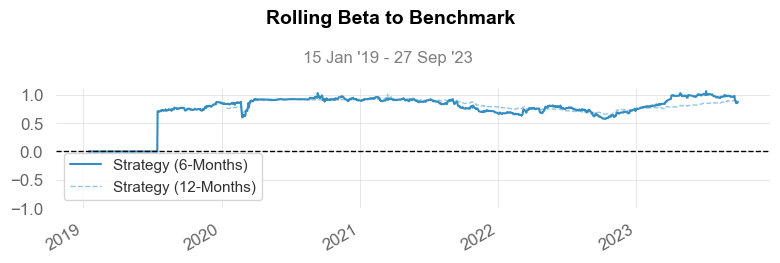

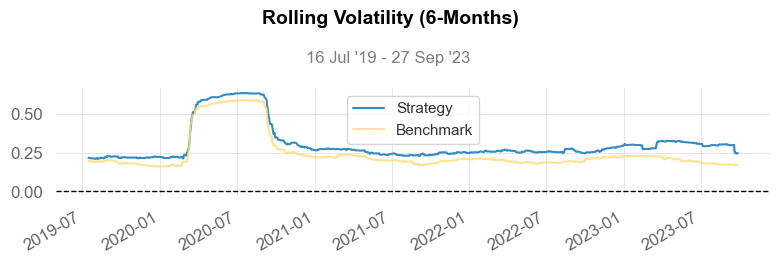

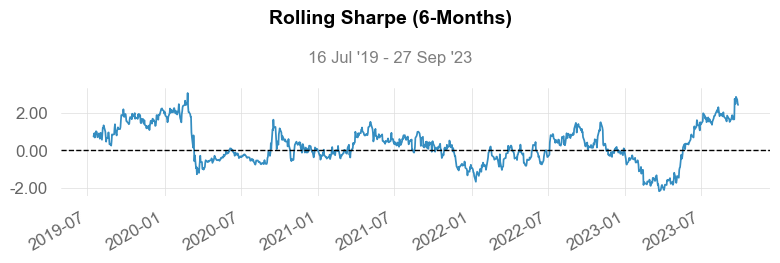

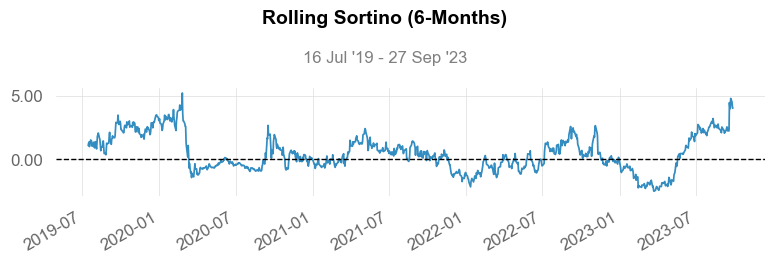

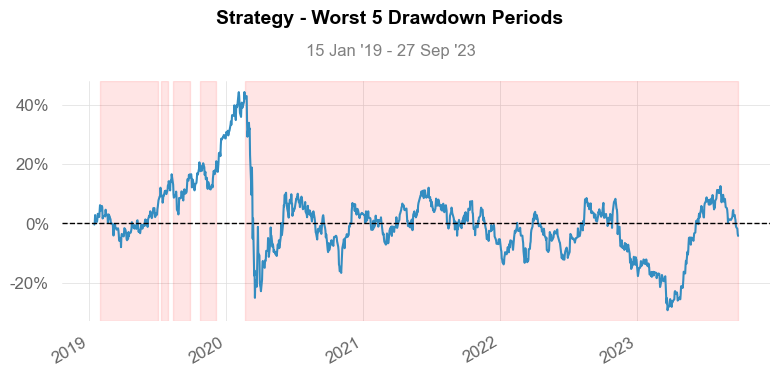

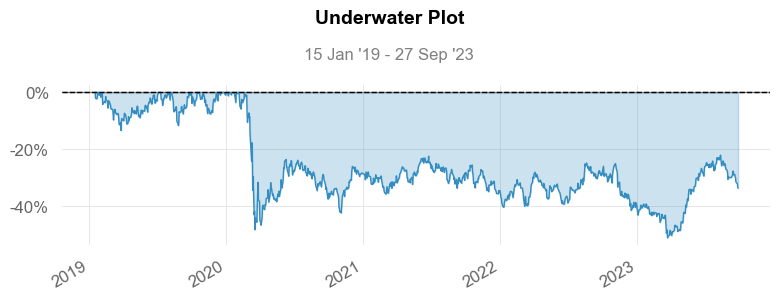

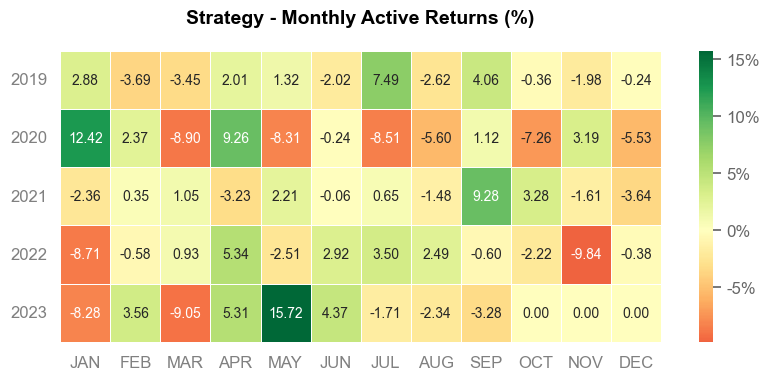

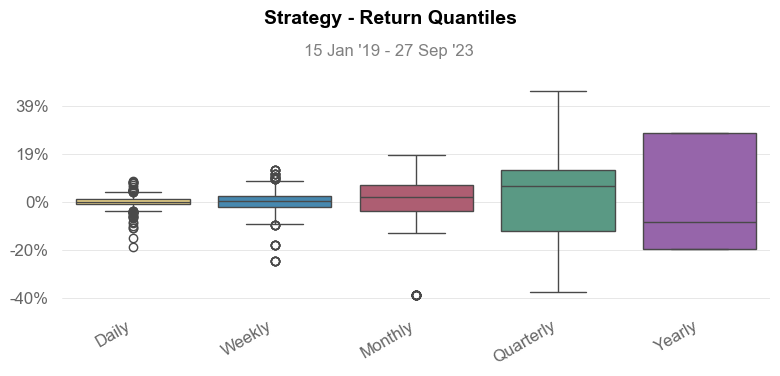

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [115]:
try:
    if if_using_ddpg:
        returns_ddpg = tratando_retornos(df_account_value_ddpg,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_ddpg,'^BVSP')
        qs.reports.html(returns_ddpg,'^BVSP', output='ddpg_quantstats.html')
    else:
        None
except:
    pass

## PPO

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-01-15   2019-01-15
End Period                 2023-09-27   2023-09-27
Risk-Free Rate             0.0%         0.0%
Time in Market             97.0%        97.0%

Cumulative Return          21.01%       0.89%
CAGR﹪                     2.84%        0.13%

Sharpe                     0.29         0.14
Prob. Sharpe Ratio         73.12%       61.49%
Smart Sharpe               0.25         0.12
Sortino                    0.39         0.18
Smart Sortino              0.33         0.16
Sortino/√2                 0.27         0.13
Smart Sortino/√2           0.23         0.11
Omega                      1.03         1.03

Max Drawdown               -46.82%      -39.38%
Longest DD Days            842          988
Volatility (ann.)          26.63%       25.24%
R^2                        0.68         0.68
Information Ratio          -0.02        -0.02
Calmar               

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-20  2020-03-18  2020-10-21   245    -39.376722        -38.404976
2  2021-01-13  2022-06-30  2023-09-27   988    -35.375706        -34.447362
3  2019-02-05  2019-05-17  2019-12-17   316    -16.498694        -15.784406
4  2020-10-23  2020-10-30  2020-11-05    14     -7.749852         -6.524486
5  2020-11-09  2020-11-23  2020-12-14    36     -4.016733         -3.744229

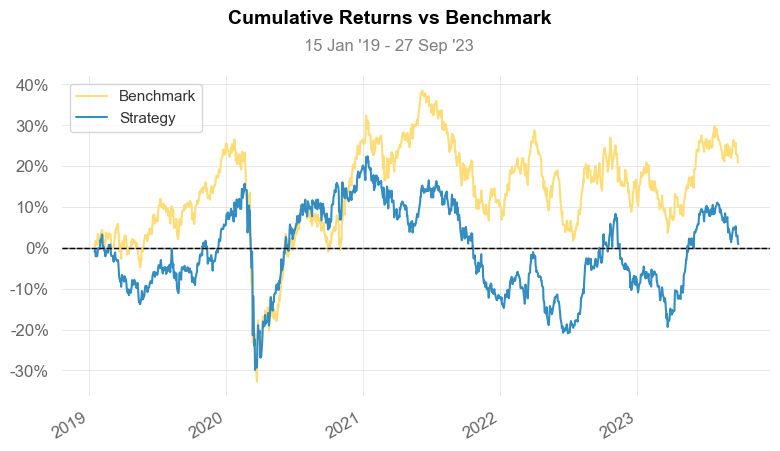

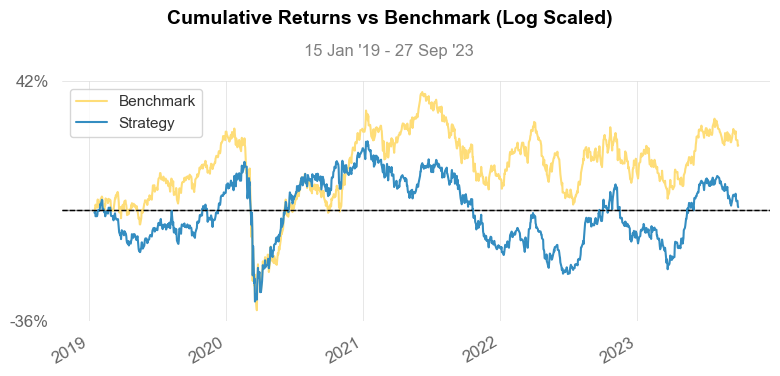

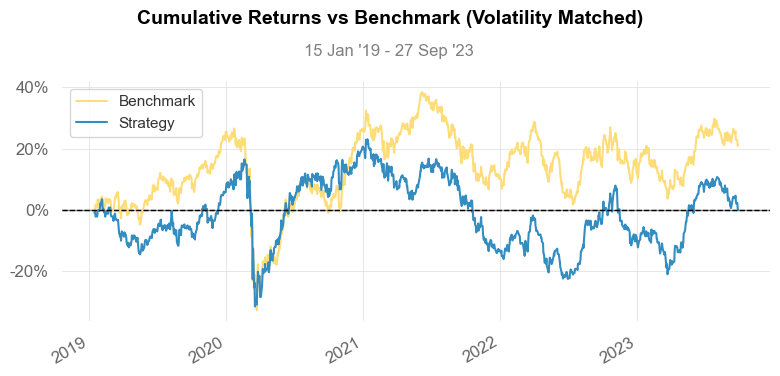

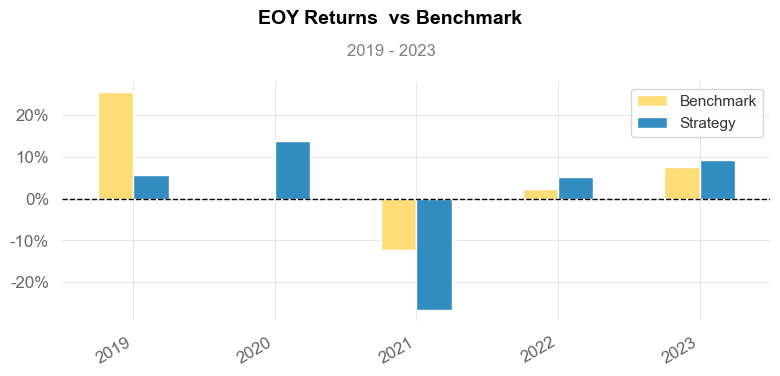

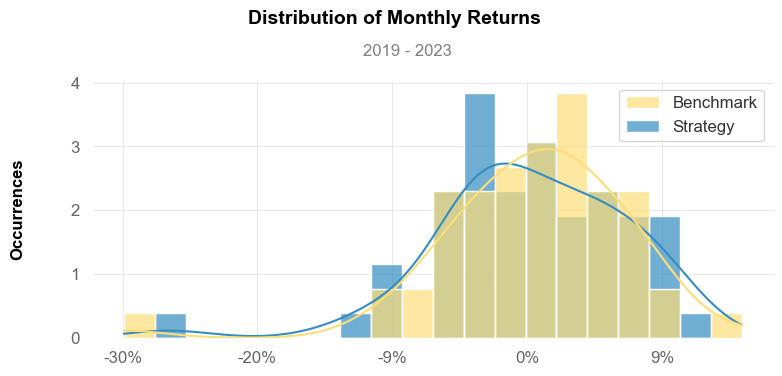

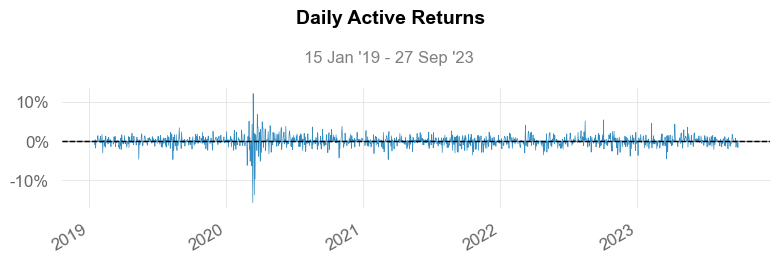

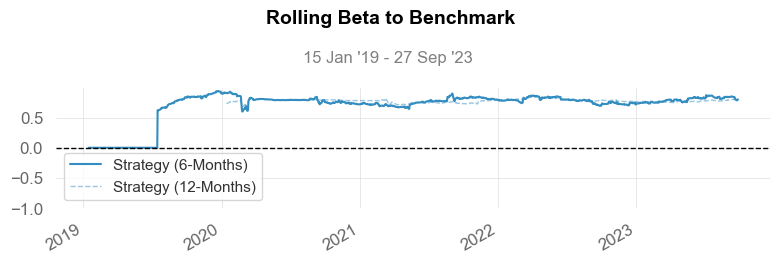

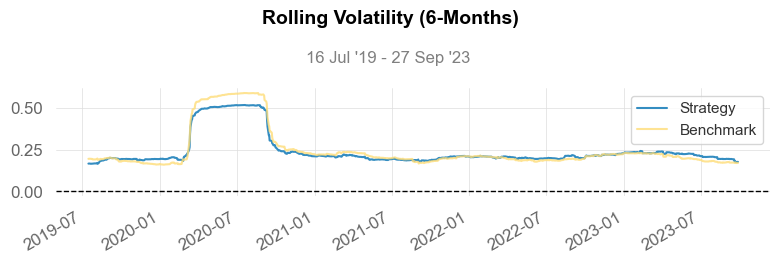

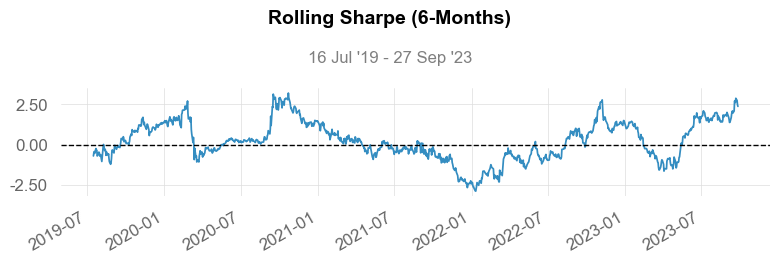

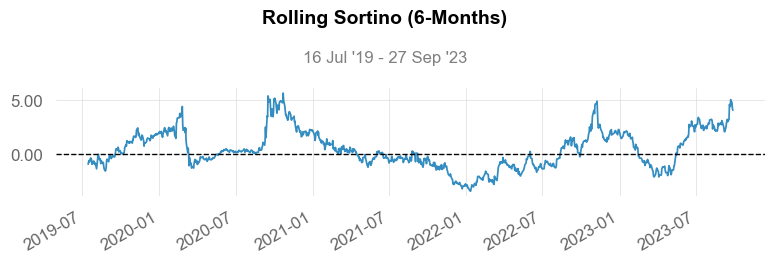

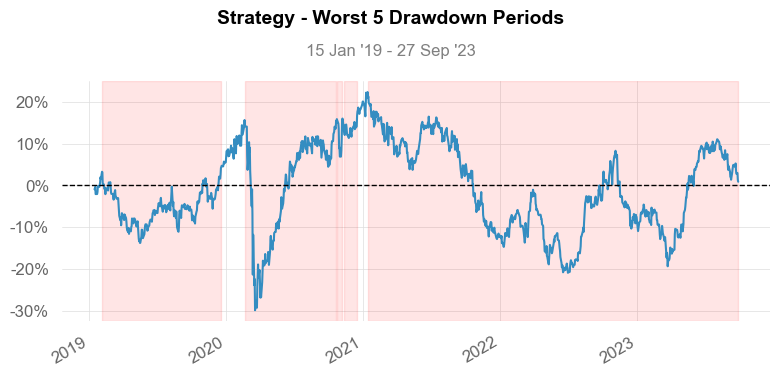

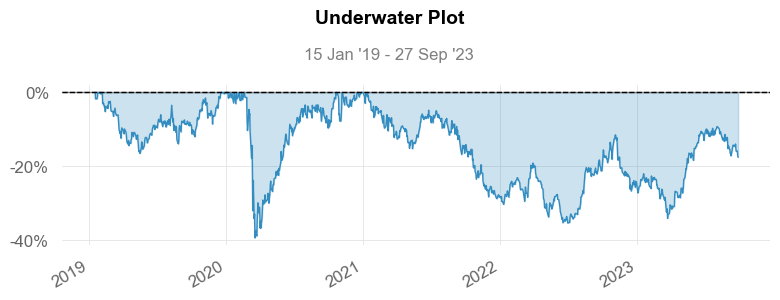

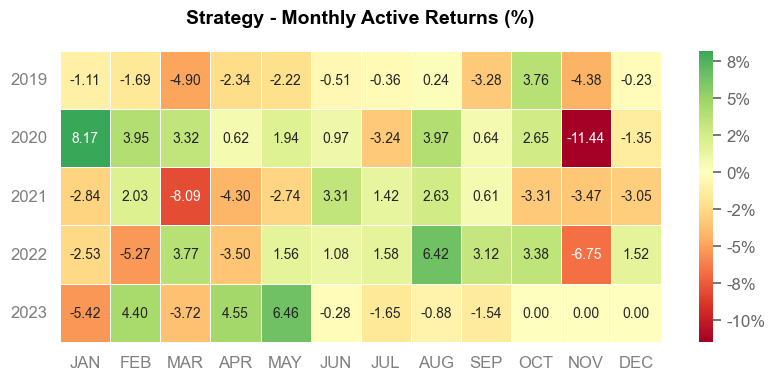

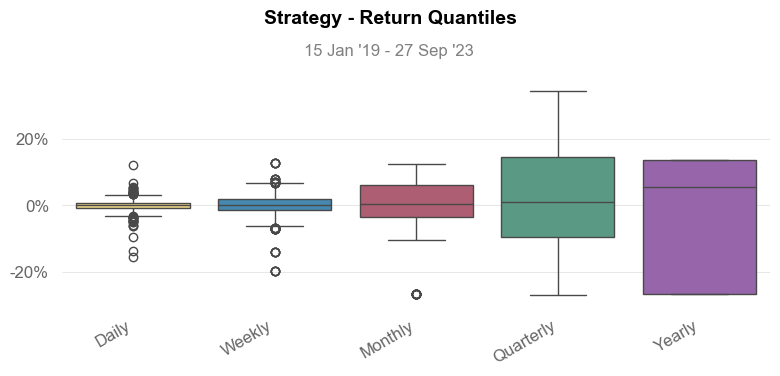

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [116]:
try:
    if if_using_ppo:
        returns_ppo = tratando_retornos(df_account_value_ppo,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_ppo,'^BVSP')
        qs.reports.html(returns_ppo,'^BVSP', output='ppo_quantstats.html')
    else:
        None
except:
    pass

## TD3

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-01-15   2019-01-15
End Period                 2023-09-27   2023-09-27
Risk-Free Rate             0.0%         0.0%
Time in Market             97.0%        97.0%

Cumulative Return          21.01%       49.02%
CAGR﹪                     2.84%        6.03%

Sharpe                     0.29         0.42
Prob. Sharpe Ratio         73.12%       81.69%
Smart Sharpe               0.28         0.41
Sortino                    0.39         0.58
Smart Sortino              0.38         0.56
Sortino/√2                 0.27         0.41
Smart Sortino/√2           0.27         0.4
Omega                      1.08         1.08

Max Drawdown               -46.82%      -57.19%
Longest DD Days            842          1227
Volatility (ann.)          26.63%       33.97%
R^2                        0.71         0.71
Information Ratio          0.02         0.02
Calmar               

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-06  2020-03-23  2023-06-16  1227    -57.192982        -50.908951
2  2019-08-05  2019-08-26  2019-10-21    78    -13.242713        -12.348444
3  2019-02-15  2019-05-17  2019-06-06   112    -13.235707        -12.136880
4  2023-09-15  2023-09-26  2023-09-27    13     -5.364513         -4.799898
5  2023-06-22  2023-07-14  2023-08-22    62     -5.177170         -5.097254

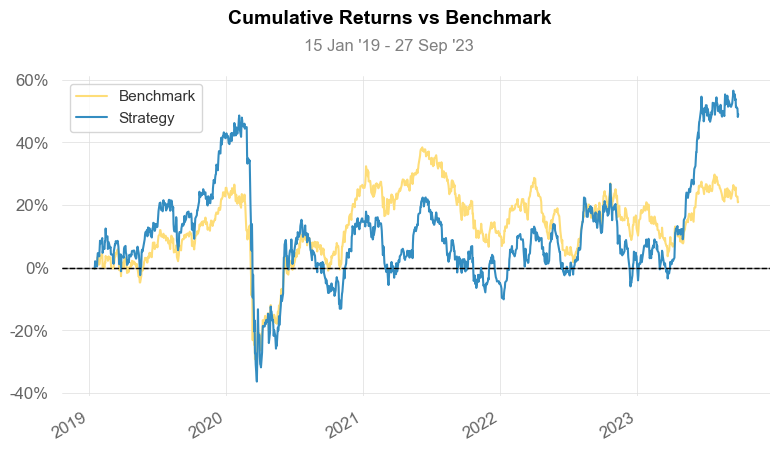

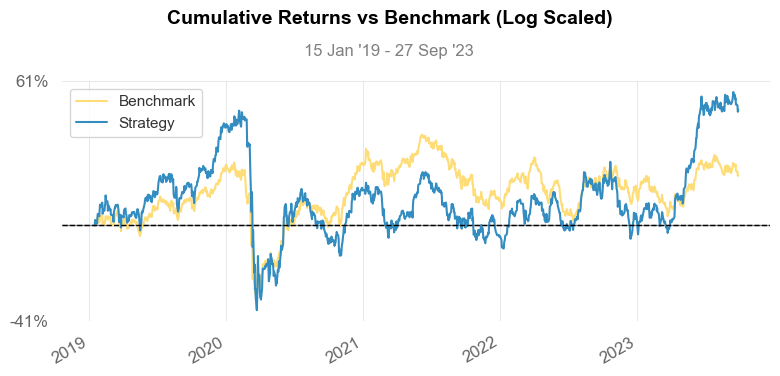

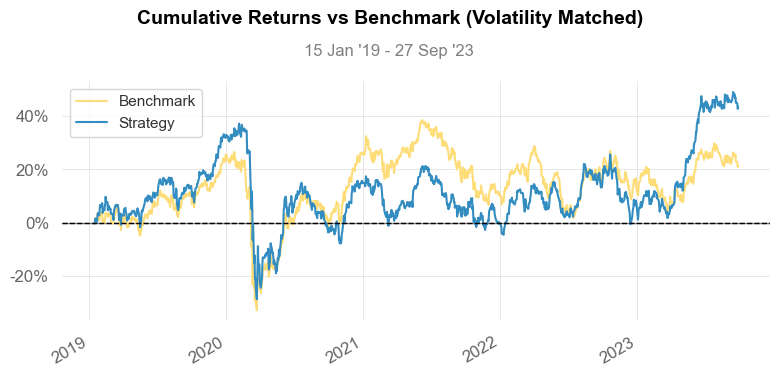

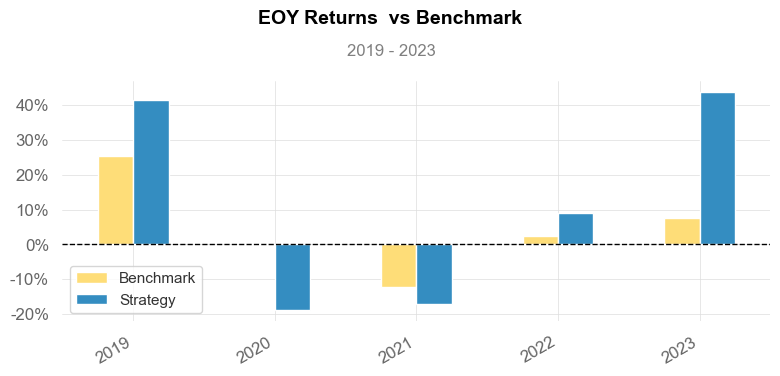

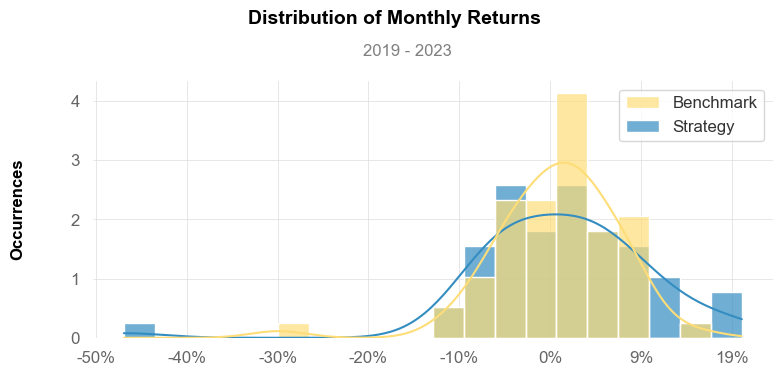

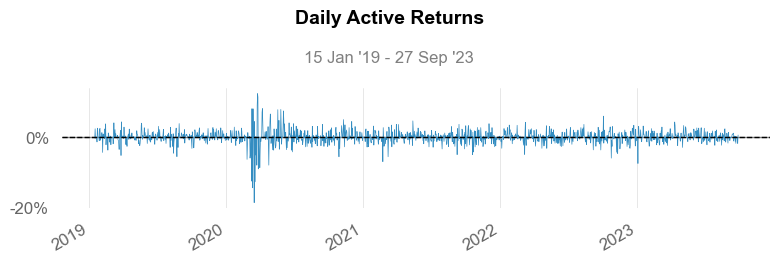

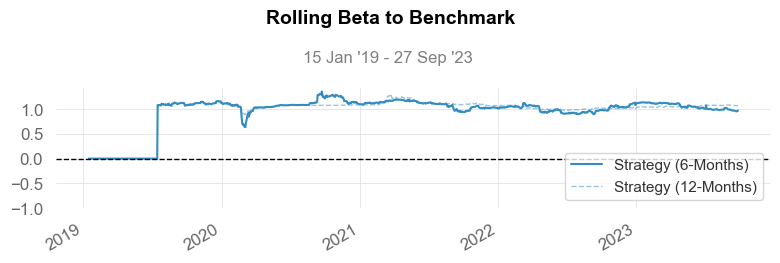

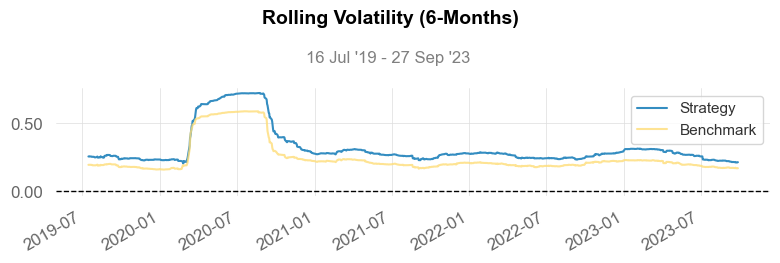

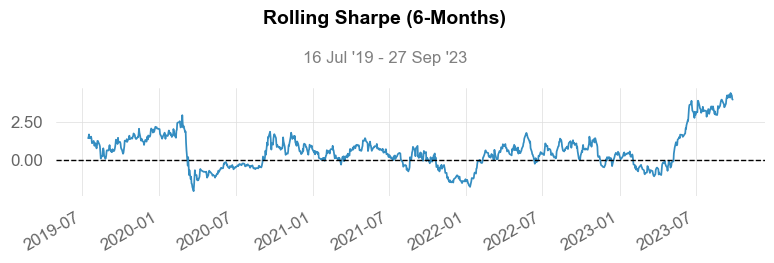

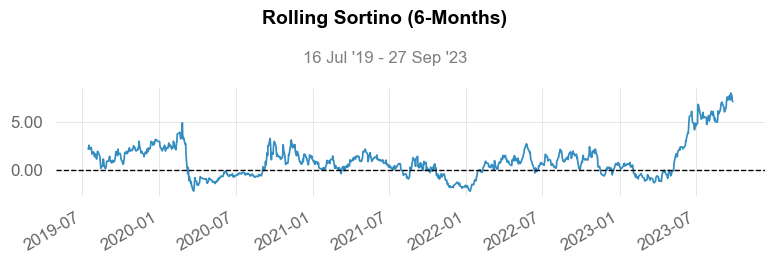

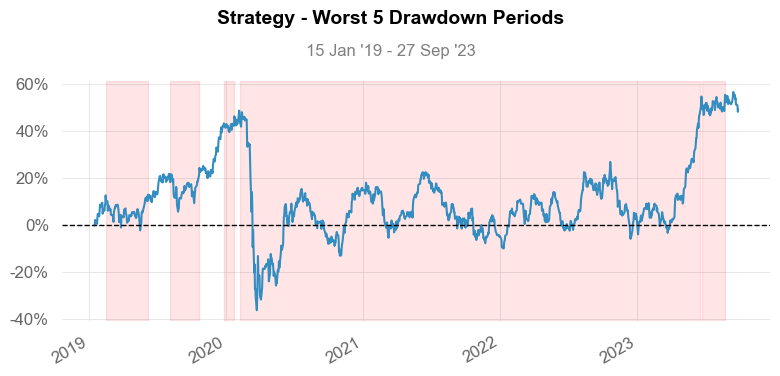

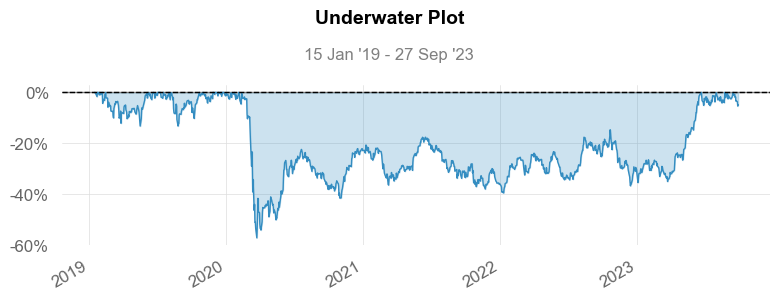

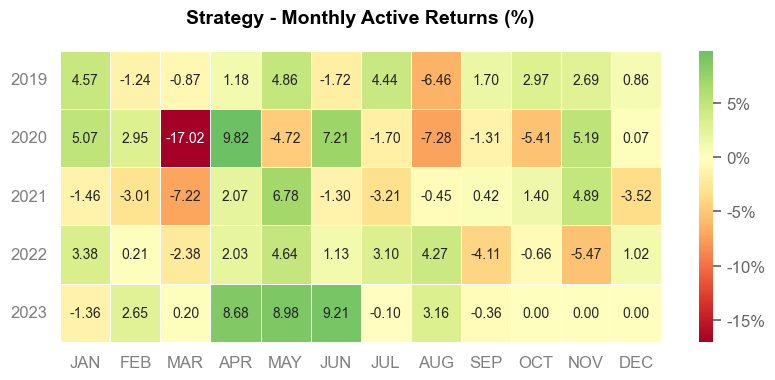

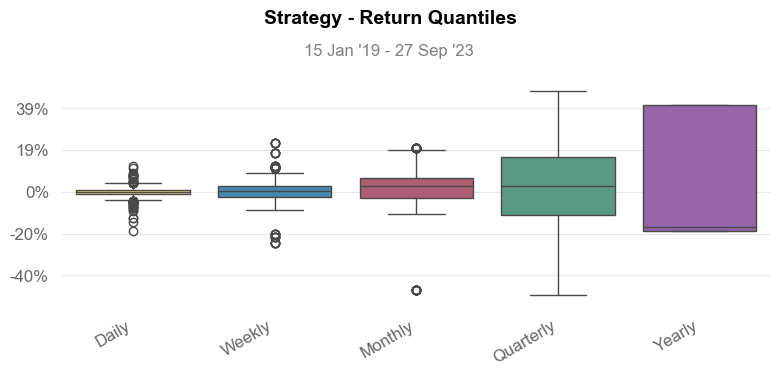

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [117]:
try:
    if if_using_td3:
        returns_td3 = tratando_retornos(df_account_value_td3,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_td3,'^BVSP')
        qs.reports.html(returns_td3, '^BVSP',output='td3_quantstats.html')
    else:
        None
except:
    pass

## SAC

In [118]:
try:
    if if_using_sac:
        returns_sac = tratando_retornos(df_account_value_sac,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_sac,'^BVSP')
        qs.reports.html(returns_sac, '^BVSP',output='sac_quantstats.html')
    else:
        None
except:
    pass

## MEAN VAR

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-01-15   2019-01-15
End Period                 2023-09-27   2023-09-27
Risk-Free Rate             0.0%         0.0%
Time in Market             97.0%        97.0%

Cumulative Return          21.01%       55.52%
CAGR﹪                     2.84%        6.7%

Sharpe                     0.29         0.5
Prob. Sharpe Ratio         73.12%       85.73%
Smart Sharpe               0.25         0.44
Sortino                    0.39         0.68
Smart Sortino              0.34         0.6
Sortino/√2                 0.27         0.48
Smart Sortino/√2           0.24         0.42
Omega                      1.1          1.1

Max Drawdown               -46.82%      -41.0%
Longest DD Days            842          500
Volatility (ann.)          26.63%       24.82%
R^2                        0.66         0.66
Information Ratio          0.02         0.02
Calmar                    

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-20  2020-03-23  2020-11-13   268    -40.999165        -40.432965
2  2021-06-16  2022-07-05  2022-10-28   500    -21.343515        -20.867064
3  2022-11-07  2022-12-13  2023-06-29   235    -15.957903        -15.617507
4  2021-01-15  2021-03-08  2021-06-04   141    -14.888824        -13.700329
5  2023-07-25  2023-09-06  2023-09-27    65     -9.459711         -9.319542

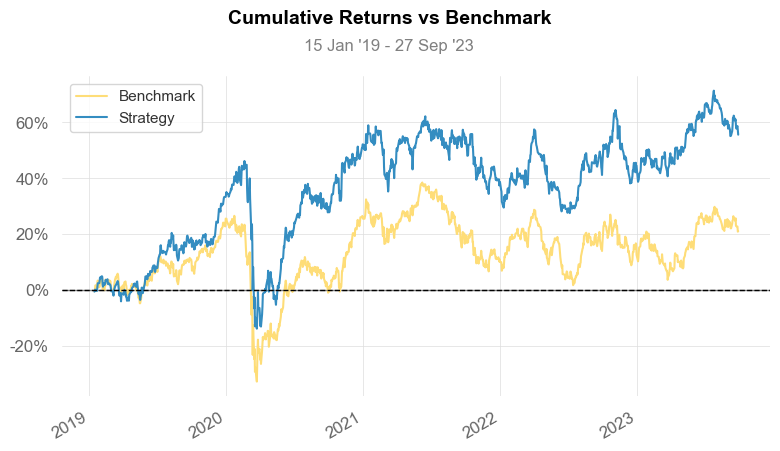

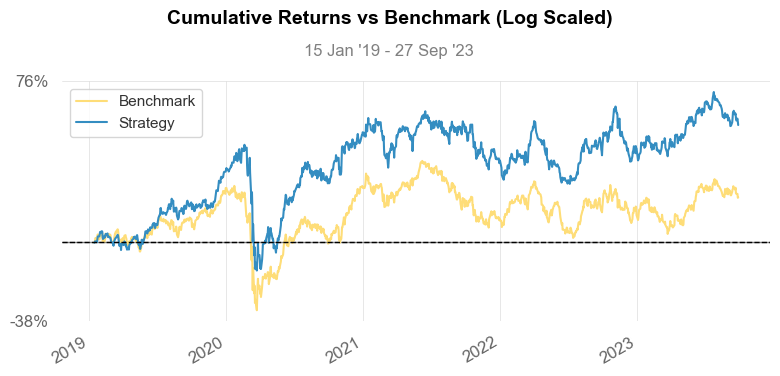

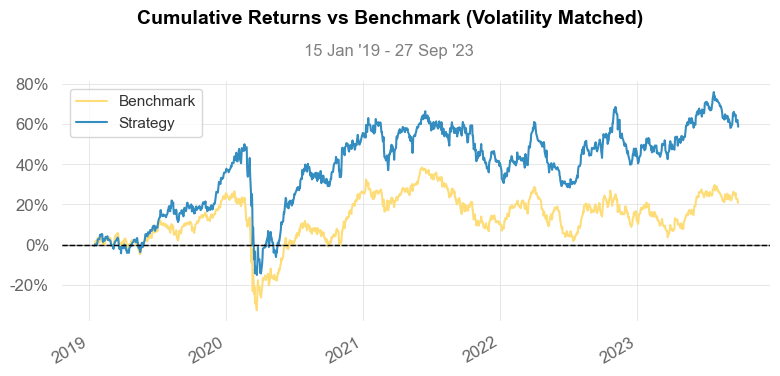

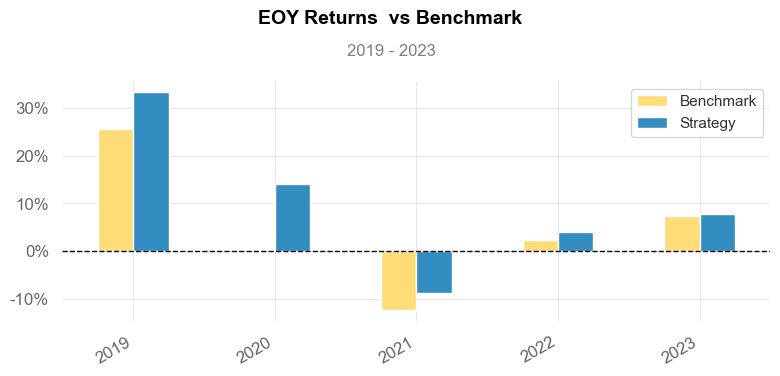

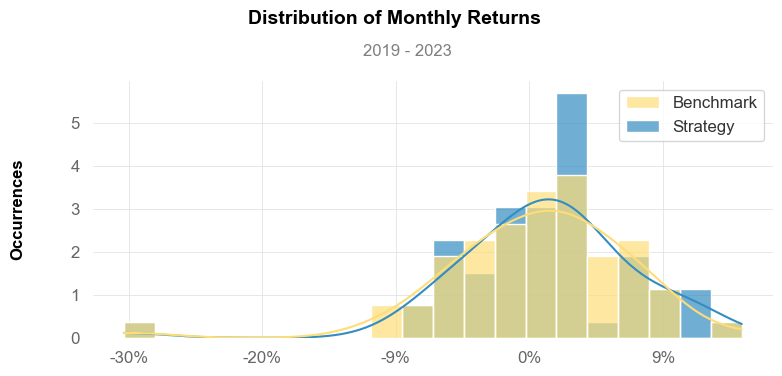

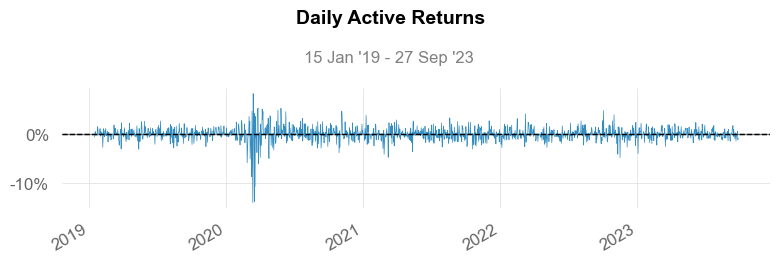

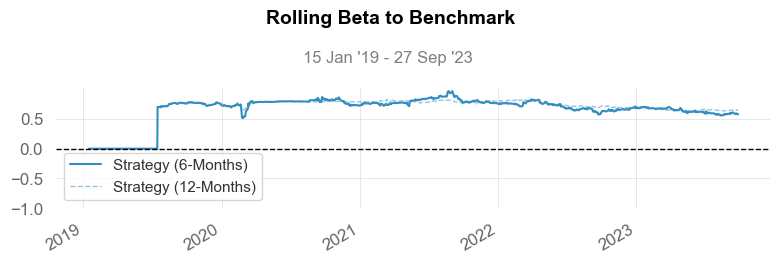

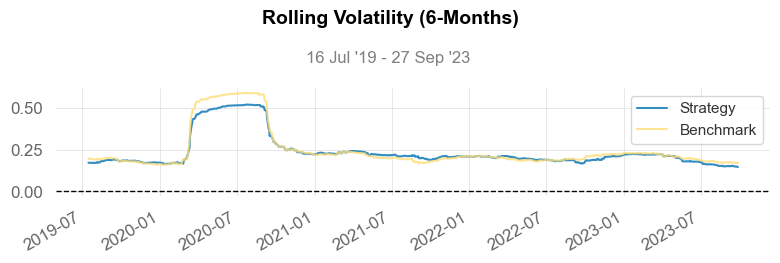

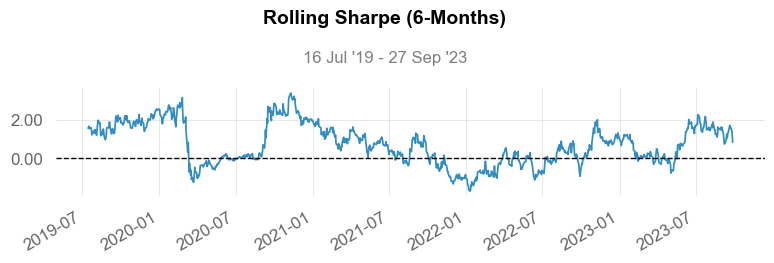

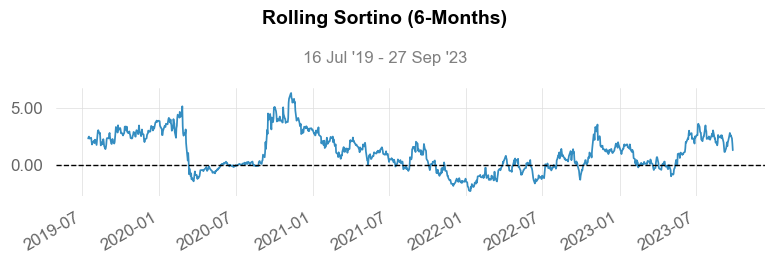

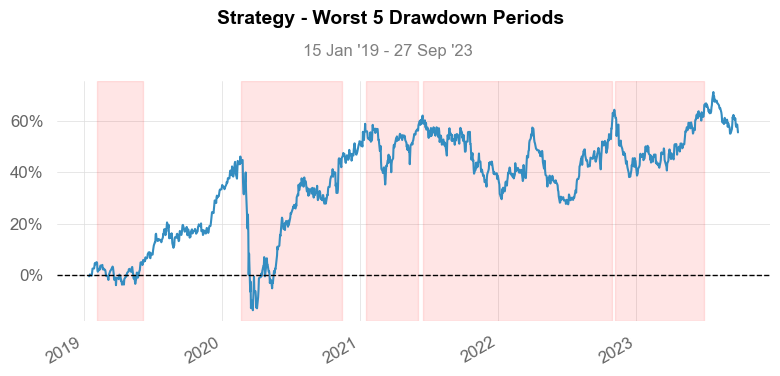

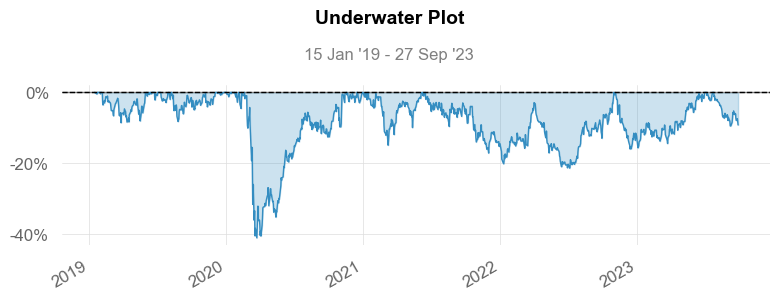

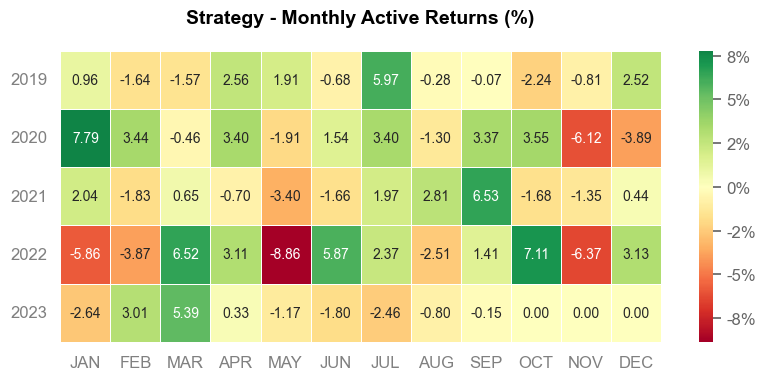

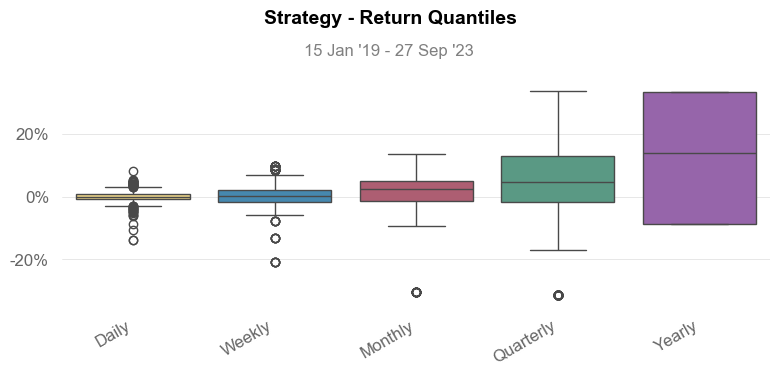

[*********************100%%**********************]  1 of 1 completed


C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [119]:
try:
    returns_mean_var = tratando_retornos_mean(MVO_result,'Mean Var')
    qs.extend_pandas()
    qs.reports.full(returns_mean_var,'^BVSP')
    qs.reports.html(returns_mean_var, '^BVSP',output='mean_var_quantstats.html')
except:
    pass